<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> Fourth section : Conclusion </center>


In this notebook you will be comparing the results of the two methods we used on the created testset. That is said: you will compare the results to the clustering with the results of the classification on the same test test and provide insights and explanation about the observed behaviour.

For this final task you will need to : 
1. Load the testset data that you created all along this project 
2. For each cluster provide percentages about each actual/ predicted class contained with this cluster. Eg : cluster N°2 : is made of ( 50% class 2 and 50% class 3 ) from actual labels and ( 40 % predicted class 2 and 40% predicted class 3 + 20% predicted class 1) 
The above is just an example and is far away from the actual situation.

3. Explain the behaviour and provide isights about it 

## 1.  Load the data: 

In [1]:
import pandas as pd 

In [2]:
# To-Do : load the test summary data 
df = pd.read_csv("test_summary.csv")

In [3]:
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,ID,cluster,Category,Predicted_class
0,50,0,42.2,145.0,27.5,37.9,4.5,13.71,8.80,103.0,239.0,73.1,206,4,0,0
1,48,1,42.5,62.2,12.1,20.1,23.1,4.01,5.58,67.0,13.0,74.2,435,3,0,0
2,54,1,39.9,30.7,17.0,19.3,6.3,6.99,4.95,68.0,13.3,70.7,483,3,0,0
3,46,1,41.1,47.5,21.0,17.7,7.1,7.55,4.42,62.0,11.9,69.8,415,3,0,0
4,57,1,38.7,62.8,21.8,29.2,9.2,6.55,7.08,68.0,13.0,70.7,505,3,0,0


## 2. Analysis: 

In [4]:
# To-Do create a summary about each cluster : 
# percentages of each target (actual Category) within each cluster 
# + Percentages of each predicted class within the cluster 
# results should be something like : 
# For clusterk : {'true_class0_percetage': 0.0,
#                 'true_class1_percetage': 0.0,
#                  'true_class2_percetage': 0.0,
#                   'true_class3_percetage': 0.0,
#                   'true_class4_percetage': 0.0,
#                   'predicted_class0_percetage': 0.0,
#                   'predicted_class1_percetage': 0.0,
#                   'predicted_class2_percetage': 0.0,
#                   'predicted_class3_percetage': 0.0,
#                    'predicted_class4_percetage': 0.0}

In [5]:
df["cluster"].unique()

array([4, 3, 1, 2], dtype=int64)

In [6]:
def summary(df):
    res={}
    for clus in sorted(df["cluster"].unique()):
        data = df[df["cluster"] == clus]
        print("                                  Cluster ", clus, "                                  ")
        categories = []
        for category in sorted(df["Category"].unique()):
            print("==> Class", category, ":")
            print("------------")
            true_cat = (data[data["Category"]==category].count()["Category"]) / (data["Category"].count())
            pred_cat = (data[data["Predicted_class"]==category].count()["Predicted_class"]) / (data["Predicted_class"].count())
            print("True_class_"+str(category)+"_percetage: ", round((true_cat*100),4) ,"%")
            print("Predicted_class_"+str(category)+"_percetage: ",round((pred_cat*100),4),"%")
            print()
            categories.append({"True_"+str(category): true_cat, "Predicted_"+str(category): pred_cat})
            res["cluster_"+str(clus)] = categories
        print("                 _____________________________________________")
        print()
    return res  
    
result = summary(df) 

                                  Cluster  1                                   
==> Class 0 :
------------
True_class_0_percetage:  0.0 %
Predicted_class_0_percetage:  0.0 %

==> Class 1 :
------------
True_class_1_percetage:  0.0 %
Predicted_class_1_percetage:  0.0 %

==> Class 2 :
------------
True_class_2_percetage:  33.3333 %
Predicted_class_2_percetage:  66.6667 %

==> Class 3 :
------------
True_class_3_percetage:  33.3333 %
Predicted_class_3_percetage:  0.0 %

==> Class 4 :
------------
True_class_4_percetage:  33.3333 %
Predicted_class_4_percetage:  33.3333 %

                 _____________________________________________

                                  Cluster  2                                   
==> Class 0 :
------------
True_class_0_percetage:  0.0 %
Predicted_class_0_percetage:  0.0 %

==> Class 1 :
------------
True_class_1_percetage:  0.0 %
Predicted_class_1_percetage:  0.0 %

==> Class 2 :
------------
True_class_2_percetage:  0.0 %
Predicted_class_2_percetage:  0.0

## 3. Explanations and insights :

In [7]:
# in this section you should display analysis about each cluster and comment those one by one 
import matplotlib.pyplot as plt

In [8]:
# From the Data Cleaning notebook we did: data['Category'].replace(
# ['0=Blood Donor', '0s=suspect Blood Donor','1=Hepatitis','2=Fibrosis','3=Cirrhosis'], [0, 1, 2, 3, 4], inplace=True)

# Class_0 = Blood Donor
# Class_1 = suspect Blood Donor
# Class_2 = Hepatitis
# Class_3 = Fibrosis
# Class_4 = Cirrhosis
labels = ["Blood Donor", "suspect Blood Donor", "Hepatitis", "Fibrosis", "Cirrhosis"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
colors = ['red', 'skyBlue', 'purple', 'blue', 'orange']

### First Cluster

In [9]:
data = df[df["cluster"] == 1]
trues= [] ; preds=[];
for category in sorted(df["Category"].unique()):
    true = (data[data["Category"]==category].count()["Category"]) / (data["Category"].count())
    pred = (data[data["Predicted_class"]==category].count()["Predicted_class"]) / (data["Predicted_class"].count())
    trues.append(true)
    preds.append(pred)

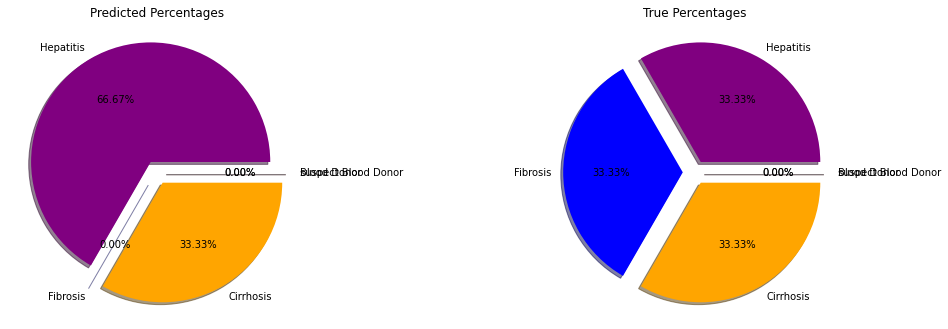

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(15, 15))
ax1.pie(preds, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax1.set_title("Predicted Percentages")
ax2.pie(trues, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax2.set_title("True Percentages")
plt.subplots_adjust(wspace=0.8)
plt.show()

From the first cluster, we can extract the following information about the:
<br> **Categories prediction**: 2 out of 3 classes were predicted. 
<br>The model predicted the _Cirrhosis_ category very well (33.33% prediction vs 33.33% true). _Hepatisis_ prediction was average (66.67% prediction vs 33.33% true), wheras the _Fibrosis_ category was not predicted at all (0% prediction vs 33.33% true).
<br>**Categories clustering**: The model grouped 3 categories into the same cluster (average performance). 

### Second Cluster

In [11]:
data = df[df["cluster"] == 2]
trues= [] ; preds=[];
for category in sorted(df["Category"].unique()):
    true = (data[data["Category"]==category].count()["Category"]) / (data["Category"].count())
    pred = (data[data["Predicted_class"]==category].count()["Predicted_class"]) / (data["Predicted_class"].count())
    trues.append(true)
    preds.append(pred)

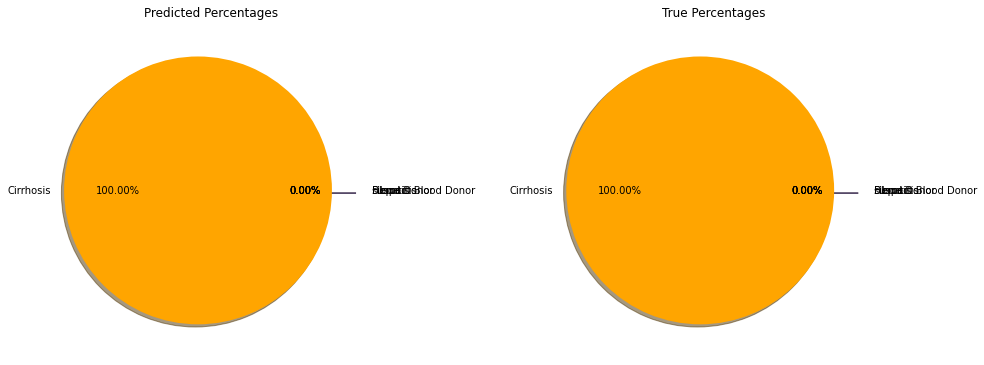

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(15, 15))
ax1.pie(preds, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax1.set_title("Predicted Percentages")
ax2.pie(trues, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax2.set_title("True Percentages")
plt.subplots_adjust(wspace=0.5)
plt.show()

<br>From the second cluster, we can extract the following information about the:
<br>**Categories prediction**: 1 out of 1 classes wes predicted. 
<br>The model's Prediction for _Cirrhosis_ was so accurate (100 % prediction vs 100% true).
<br>**Categories clustering**: the model grouped 1 category into 1 cluster (excellent performance).

### Third Cluster

In [13]:
data = df[df["cluster"] == 3]
trues= [] ; preds=[];
for category in sorted(df["Category"].unique()):
    true = (data[data["Category"]==category].count()["Category"]) / (data["Category"].count())
    pred = (data[data["Predicted_class"]==category].count()["Predicted_class"]) / (data["Predicted_class"].count())
    trues.append(true)
    preds.append(pred)

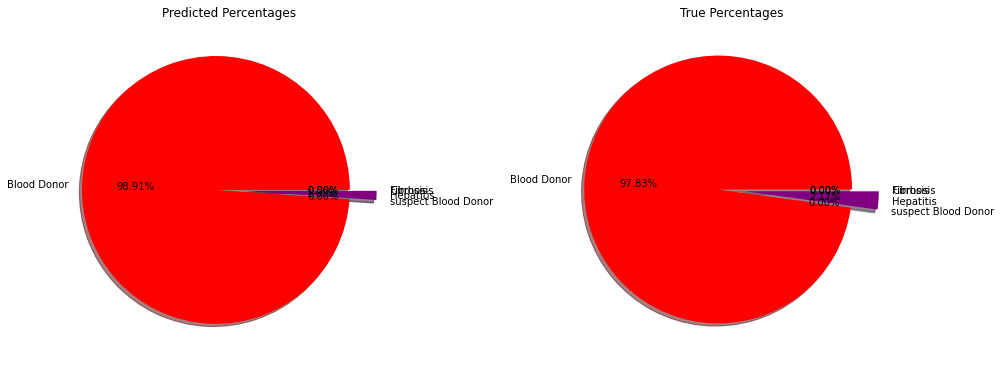

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(15, 15))
ax1.pie(preds, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax1.set_title("Predicted Percentages")
ax2.pie(trues, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax2.set_title("True Percentages")
plt.subplots_adjust(wspace=0.5)
plt.show()

<br>From the third cluster, we can extract the following information about the:
<br>**Categories prediction**: 2 out of 2 classes were predicted.
<br>The model predicted the _Blood Donor_ category really well (98.91 % prediction vs 97.83 % true). The _Hepatisis_ category prediction was acceptable too (1.08 % prediction vs 2.17 % true).
<br>**Categories clustering**: grouped the _blood donor_ category into the 1 cluster (good performance). 

### Fourth Cluster

In [15]:
data = df[df["cluster"] == 4]
trues= [] ; preds=[];
for category in sorted(df["Category"].unique()):
    true = (data[data["Category"]==category].count()["Category"]) / (data["Category"].count())
    pred = (data[data["Predicted_class"]==category].count()["Predicted_class"]) / (data["Predicted_class"].count())
    trues.append(true)
    preds.append(pred)

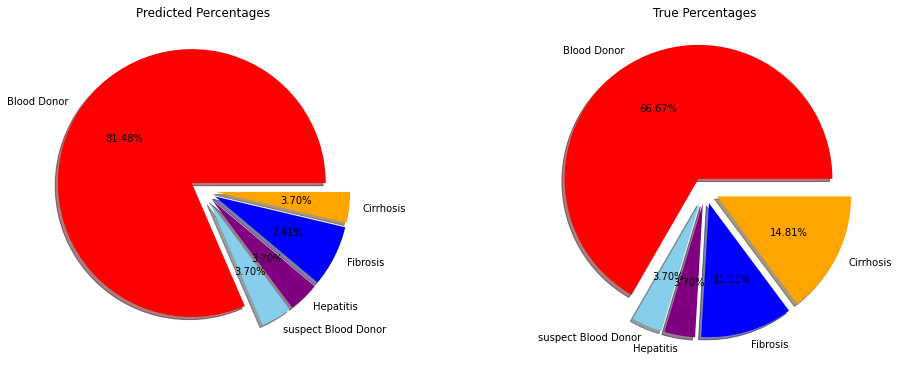

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize =(15, 15))
ax1.pie(preds, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax1.set_title("Predicted Percentages")
ax2.pie(trues, labels=labels, colors=colors, shadow = True, explode = explode, autopct='%1.2f%%')
ax2.set_title("True Percentages")
plt.subplots_adjust(wspace=0.5)
plt.show()

<br>From the fourth cluster, we can extract the following information about the:
<br>**Categories prediction**: 5 out of 5 classes were predicted.
<br>The model predicted both the _suspect Blood Donor_ and the _Hepatitis_ classes perfectly (3.70% prediction vs 3.70% true for each). However, prediction of the classes _Blood Donor_, _Cirrhosis_ and _Fibrosis_ was not the best.
<br>**Categories clustering**: the model grouped 5 categories into the same cluster (poor performance).

## 4. Conclusion:

Explain your findings and provide reasons for the behaviour.

- For the supervised learning part (categories prediction), maybe reducing the number of features (deleting or eliminating one of the perfectly correlated features, and keeping the ones who have a high correlation with the target) would be helpful.


- For the unsupervised learning part (categories clustering), data was not balanced enough. It contained alot of Blood Donors (about 86% of the dataset) and alot less of other categories as we can see below. That is why 2/4 clusters had their main class as the Blood Donor one.


In [17]:
data = pd.read_csv("clean_HepatitisCdata.csv")
data["Category"].value_counts()

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64